In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from pathlib import Path
import hvplot.pandas
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [67]:
# Read the data into a Pandas DataFrame
finance_loan = Path(r'C:\Users\laris\Documents\Project4-Group1\Project4-Group1\Resources\finance-loan.csv')
finance_loan_df = pd.read_csv(finance_loan)
finance_loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Note**: This loan prediction was chosen to work with the train set, which we named finance_loan_df. There are 13 columns of features and 614 rows of records.
- 3 data types in the original data as object,int64 and float64.

In [68]:
# Get a brief summary of the DataFrame
finance_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [69]:
# Combine Applicant Income and Co-applicant Income into a new column
finance_loan_df['Total_Income'] = finance_loan_df['ApplicantIncome'] + finance_loan_df['CoapplicantIncome']

In [70]:
#Make bins for Applicant Income and create a new column
income_bins=[0,7000,1500,25000,40000,max(finance_loan_df['ApplicantIncome'])+1]
income_labels = ['Very_Low','Low','Average','High','Very_High']
#bins sorted
income_bins.sort()
# Use `pd.cut` to categorize income
finance_loan_df['Income_Category'] = pd.cut(finance_loan_df['ApplicantIncome'], bins=income_bins, labels=income_labels, include_lowest=True)
finance_loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Income_Category
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,Low
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Low
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,Low
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,Low


In [71]:
finance_loan_df['Income_Category'] = finance_loan_df['Income_Category'].astype('str') 

In [72]:
#Get the shape of the dataset after the columns were added
finance_loan_df.shape

(614, 15)

In [73]:
#Get the data types of the data after the colimns were added
finance_loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income         float64
Income_Category       object
dtype: object

**Note**: The dataset set has 15 columns now but still 614 rows of records.

In [74]:
# Check for any empty cells/ missing data
empty_cells = finance_loan_df.isna().any()
print("Empty Cells:")
print(empty_cells)

Empty Cells:
Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
Total_Income         False
Income_Category      False
dtype: bool


In [75]:
# Check and Remove any Duplicates in the dataset
duplicate_rows = finance_loan_df[finance_loan_df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status, Total_Income, Income_Category]
Index: []


In [76]:
# Renaming column for better understanding
renamed_df = finance_loan_df.rename(columns={"ApplicantIncome": "Applicant_Income", "CoapplicantIncome":"Co-applicant_Income", "LoanAmount":"Loan_Amount",
                                             "Loan_Amount_Term": "Terms_of_loan_in_months", "Dependents": "Number_of_Dependents"})
renamed_df.head()

,Loan_ID,Gender,Married,Number_of_Dependents,Education,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Terms_of_loan_in_months,Credit_History,Property_Area,Loan_Status,Total_Income,Income_Category
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,Low
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Low
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,Low
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,Low


In [77]:
# Drop rows with empty cells
new_df = renamed_df.dropna()
new_df

,Loan_ID,Gender,Married,Number_of_Dependents,Education,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Terms_of_loan_in_months,Credit_History,Property_Area,Loan_Status,Total_Income,Income_Category
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Low
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,Low
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,Low
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Low
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,Low
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,Average
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,Average


In [78]:
# Save new df to a file, that will be used for the tableau
new_df.to_csv(r"C:\Users\laris\Documents\Project4-Group1\Project4-Group1\Resources\new_df.csv", index=False)

In [79]:
# Adding a new column 'ID' with unique identifiers starting from 1
new_df['ID'] = range(1, len(new_df) + 1)

# Reordering teh DataFrame columns
columns = ['ID'] + [col for col in new_df.columns if col != 'ID']
new_df = new_df[columns]

# Print
new_df.head()

C:\Users\laris\AppData\Local\Temp\ipykernel_15108\443788874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['ID'] = range(1, len(new_df) + 1)


,ID,Loan_ID,Gender,Married,Number_of_Dependents,Education,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Terms_of_loan_in_months,Credit_History,Property_Area,Loan_Status,Total_Income,Income_Category
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Low
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Low
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,Low
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,Low
5,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,Low


In [80]:
# Drop 'Loan_ID' column
new_finance_loan_df = new_df.drop('Loan_ID', axis=1)
new_finance_loan_df

,ID,Gender,Married,Number_of_Dependents,Education,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Terms_of_loan_in_months,Credit_History,Property_Area,Loan_Status,Total_Income,Income_Category
1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Low
2,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Low
3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,Low
4,4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,Low
5,5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,476,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Low
610,477,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,Low
611,478,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,Average
612,479,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,Average


In [81]:
new_finance_loan_df['Number_of_Dependents']= new_finance_loan_df['Number_of_Dependents'].replace(['0', '1', '2', '3+'],['0','1','2','3'])
new_finance_loan_df

,ID,Gender,Married,Number_of_Dependents,Education,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Terms_of_loan_in_months,Credit_History,Property_Area,Loan_Status,Total_Income,Income_Category
1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Low
2,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Low
3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,Low
4,4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,Low
5,5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,476,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Low
610,477,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,Low
611,478,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,Average
612,479,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,Average


In [82]:
# Review for any empty cells/ missing data
empty_cells = new_finance_loan_df.isna().any()
print("Empty Cells:")
print(empty_cells)

Empty Cells:
ID                         False
Gender                     False
Married                    False
Number_of_Dependents       False
Education                  False
Self_Employed              False
Applicant_Income           False
Co-applicant_Income        False
Loan_Amount                False
Terms_of_loan_in_months    False
Credit_History             False
Property_Area              False
Loan_Status                False
Total_Income               False
Income_Category            False
dtype: bool


## Transform "Education" column with get_dummies

In [83]:
# Verify the categories of the "education" column
new_finance_loan_df["Education"].value_counts()

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

In [84]:
# Transform the education column using get_dummies
education_dummies = pd.get_dummies(new_finance_loan_df["Education"])

# Display the transformed data
education_dummies.tail()

,Graduate,Not Graduate
609,True,False
610,True,False
611,True,False
612,True,False
613,True,False


In [85]:
# Concatenate the finance_loan_df and the finance_loan_df_dummies DataFrames
new_finance_loan_df = pd.concat([new_finance_loan_df, education_dummies], axis=1)

# Drop the original education column
new_finance_loan_df = new_finance_loan_df.drop(columns=["Education"])

# Display the DataFrame
new_finance_loan_df.head()

,ID,Gender,Married,Number_of_Dependents,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Terms_of_loan_in_months,Credit_History,Property_Area,Loan_Status,Total_Income,Income_Category,Graduate,Not Graduate
1,1,Male,Yes,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Low,True,False
2,2,Male,Yes,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Low,True,False
3,3,Male,Yes,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,Low,False,True
4,4,Male,No,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,Low,True,False
5,5,Male,Yes,2,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,Low,True,False


## Transform "Income_Category" column with get_dummies

In [86]:
# Verify the categories of the "education" column
new_finance_loan_df["Income_Category"].value_counts()

Income_Category
Low          388
Average       79
Very_Low       8
High           4
Very_High      1
Name: count, dtype: int64

In [87]:
# Transform the education column using get_dummies
incomecategory_dummies = pd.get_dummies(new_finance_loan_df["Income_Category"])

# Display the transformed data
incomecategory_dummies.tail()

,Average,High,Low,Very_High,Very_Low
609,False,False,True,False,False
610,False,False,True,False,False
611,True,False,False,False,False
612,True,False,False,False,False
613,False,False,True,False,False


In [88]:
# Concatenate the finance_loan_df and the finance_loan_df_dummies DataFrames
new_finance_loan_df = pd.concat([new_finance_loan_df, incomecategory_dummies], axis=1)

# Drop the original Income_Category column
new_finance_loan_df = new_finance_loan_df.drop(columns=["Income_Category"])

# Display the DataFrame
new_finance_loan_df.tail()

,ID,Gender,Married,Number_of_Dependents,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Terms_of_loan_in_months,Credit_History,Property_Area,Loan_Status,Total_Income,Graduate,Not Graduate,Average,High,Low,Very_High,Very_Low
609,476,Female,No,0,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,True,False,False,False,True,False,False
610,477,Male,Yes,3,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,True,False,False,False,True,False,False
611,478,Male,Yes,1,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,True,False,True,False,False,False,False
612,479,Male,Yes,2,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,True,False,True,False,False,False,False
613,480,Female,No,0,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N,4583.0,True,False,False,False,True,False,False


## Transform "Married" column with encoding function

In [89]:
def encode_Married(Married):
    """This function encodes married by setting Yes as 1 and No as 0."""
    if Married == "Yes":
        return 1
    else:
        return 0

# Encode_Married function on the Married column
new_finance_loan_df["Married"] = new_finance_loan_df["Married"].apply(encode_Married)

# Review the DataFrame 
new_finance_loan_df.head()

,ID,Gender,Married,Number_of_Dependents,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Terms_of_loan_in_months,Credit_History,Property_Area,Loan_Status,Total_Income,Graduate,Not Graduate,Average,High,Low,Very_High,Very_Low
1,1,Male,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,True,False,False,False,True,False,False
2,2,Male,1,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,True,False,False,False,True,False,False
3,3,Male,1,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,False,True,False,False,True,False,False
4,4,Male,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,True,False,False,False,True,False,False
5,5,Male,1,2,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,True,False,False,False,True,False,False


## Transform "Self_Employed" column with encoding function

In [90]:
def encode_Self_Employed(Self_Employed):
    """This function encodes the self employee status by setting Yes as 1 and No as 0."""
    if Self_Employed == "Yes":
        return 1
    else:
        return 0

# Encode_Married function on the Married column
new_finance_loan_df["Self_Employed"] = new_finance_loan_df["Self_Employed"].apply(encode_Self_Employed)

# Review the DataFrame 
new_finance_loan_df.head()

,ID,Gender,Married,Number_of_Dependents,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Terms_of_loan_in_months,Credit_History,Property_Area,Loan_Status,Total_Income,Graduate,Not Graduate,Average,High,Low,Very_High,Very_Low
1,1,Male,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,True,False,False,False,True,False,False
2,2,Male,1,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,True,False,False,False,True,False,False
3,3,Male,1,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,False,True,False,False,True,False,False
4,4,Male,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,True,False,False,False,True,False,False
5,5,Male,1,2,1,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,True,False,False,False,True,False,False


## Transform "Gender" column with encoding function

In [91]:
def encode_Gender(Gender):
    """This function encodes the gender by setting Male as 1, Female as 0 and ."""
    if Gender == "Male":
        return 1
    else:
        return 0

# Encode_Married function on the Married column
new_finance_loan_df["Gender"] = new_finance_loan_df["Gender"].apply(encode_Gender)

# Review the DataFrame 
new_finance_loan_df.head()

,ID,Gender,Married,Number_of_Dependents,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Terms_of_loan_in_months,Credit_History,Property_Area,Loan_Status,Total_Income,Graduate,Not Graduate,Average,High,Low,Very_High,Very_Low
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,True,False,False,False,True,False,False
2,2,1,1,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,True,False,False,False,True,False,False
3,3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,False,True,False,False,True,False,False
4,4,1,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,True,False,False,False,True,False,False
5,5,1,1,2,1,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,True,False,False,False,True,False,False


## Transform "Property_Area" column with get_dummies

In [92]:
# Verify the categories of the "education" column
new_finance_loan_df["Property_Area"].value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

In [93]:
# Transform the education column using get_dummies
propertyarea_dummies = pd.get_dummies(new_finance_loan_df["Property_Area"])

# Display the transformed data
propertyarea_dummies.tail()

,Rural,Semiurban,Urban
609,True,False,False
610,True,False,False
611,False,False,True
612,False,False,True
613,False,True,False


In [94]:
# Concatenate the finance_loan_df and the finance_loan_df_dummies DataFrames
new_finance_loan_df = pd.concat([new_finance_loan_df, propertyarea_dummies], axis=1)

# Drop the original Property_Area column
new_finance_loan_df = new_finance_loan_df.drop(columns=["Property_Area"])

# Display the DataFrame
new_finance_loan_df.tail()

,ID,Gender,Married,Number_of_Dependents,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Terms_of_loan_in_months,Credit_History,...,Graduate,Not Graduate,Average,High,Low,Very_High,Very_Low,Rural,Semiurban,Urban
609,476,0,0,0,0,2900,0.0,71.0,360.0,1.0,...,True,False,False,False,True,False,False,True,False,False
610,477,1,1,3,0,4106,0.0,40.0,180.0,1.0,...,True,False,False,False,True,False,False,True,False,False
611,478,1,1,1,0,8072,240.0,253.0,360.0,1.0,...,True,False,True,False,False,False,False,False,False,True
612,479,1,1,2,0,7583,0.0,187.0,360.0,1.0,...,True,False,True,False,False,False,False,False,False,True
613,480,0,0,0,1,4583,0.0,133.0,360.0,0.0,...,True,False,False,False,True,False,False,False,True,False


## Transform "Loan_Status" column with encoding function

In [95]:
def encode_Loan_Status(Loan_Status):
    """This function encodes the loan status by setting Y as 1 and N as 0."""
    if Loan_Status == "Y":
        return 1
    else:
        return 0

# Encode_Married function on the Married column
new_finance_loan_df["Loan_Status"] = new_finance_loan_df["Loan_Status"].apply(encode_Loan_Status)

# Review the DataFrame 
new_finance_loan_df.head()

,ID,Gender,Married,Number_of_Dependents,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Terms_of_loan_in_months,Credit_History,...,Graduate,Not Graduate,Average,High,Low,Very_High,Very_Low,Rural,Semiurban,Urban
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,...,True,False,False,False,True,False,False,True,False,False
2,2,1,1,0,1,3000,0.0,66.0,360.0,1.0,...,True,False,False,False,True,False,False,False,False,True
3,3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,...,False,True,False,False,True,False,False,False,False,True
4,4,1,0,0,0,6000,0.0,141.0,360.0,1.0,...,True,False,False,False,True,False,False,False,False,True
5,5,1,1,2,1,5417,4196.0,267.0,360.0,1.0,...,True,False,False,False,True,False,False,False,False,True


In [96]:
new_finance_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       480 non-null    int64  
 1   Gender                   480 non-null    int64  
 2   Married                  480 non-null    int64  
 3   Number_of_Dependents     480 non-null    object 
 4   Self_Employed            480 non-null    int64  
 5   Applicant_Income         480 non-null    int64  
 6   Co-applicant_Income      480 non-null    float64
 7   Loan_Amount              480 non-null    float64
 8   Terms_of_loan_in_months  480 non-null    float64
 9   Credit_History           480 non-null    float64
 10  Loan_Status              480 non-null    int64  
 11  Total_Income             480 non-null    float64
 12  Graduate                 480 non-null    bool   
 13  Not Graduate             480 non-null    bool   
 14  Average                  480 no

<Axes: xlabel='Applicant_Income'>

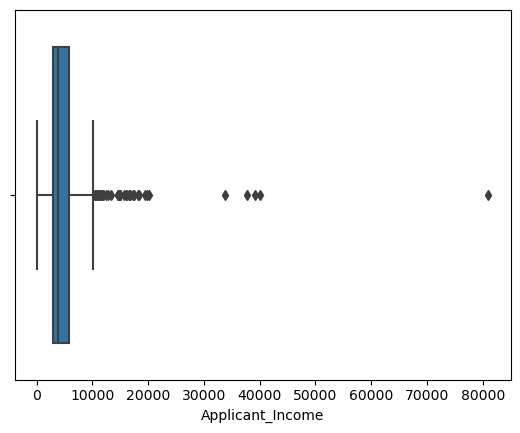

In [97]:
#Getting the boxplot of the Applicant_Income 
sns.boxplot(x = new_finance_loan_df['Applicant_Income'])

<Axes: xlabel='Applicant_Income'>

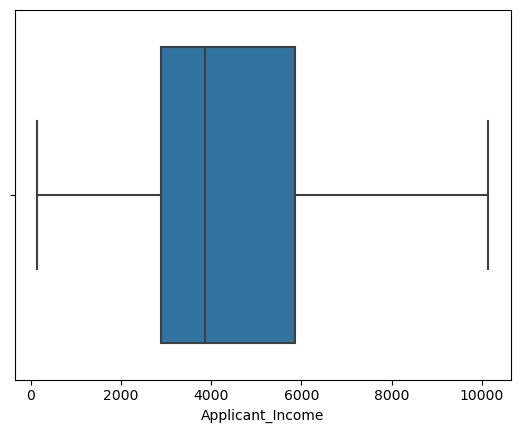

In [98]:
#Getting the boxplot of the Applicant_Income without the outliers
sns.boxplot(x = new_finance_loan_df['Applicant_Income'], showfliers=False)

<Axes: xlabel='Co-applicant_Income'>

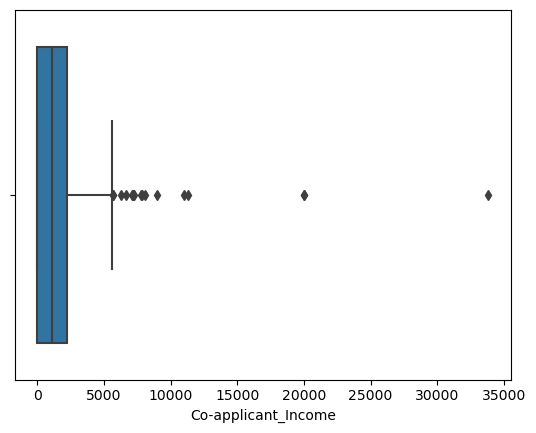

In [99]:
sns.boxplot(x = new_finance_loan_df['Co-applicant_Income'])

<Axes: xlabel='Co-applicant_Income'>

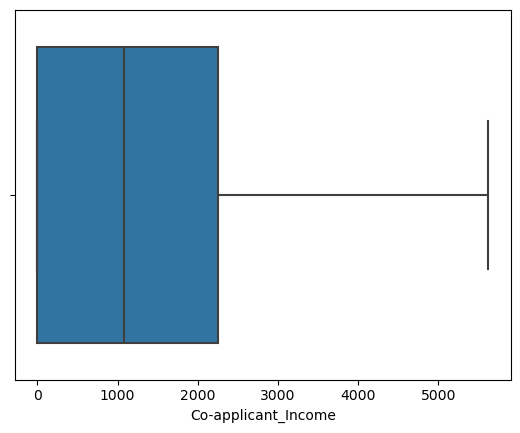

In [100]:
#Getting the boxplot of the Co-applicant_Income without the outliers
sns.boxplot(x = new_finance_loan_df['Co-applicant_Income'], showfliers=False)

<Axes: xlabel='Total_Income'>

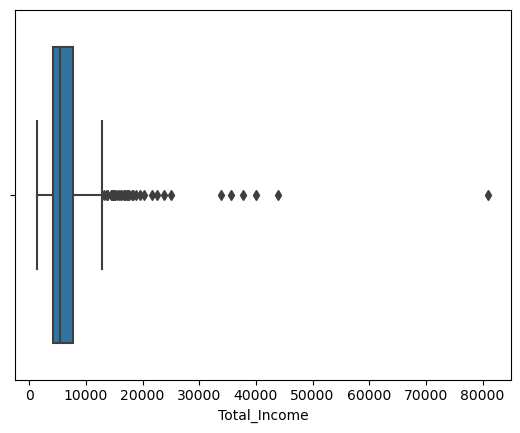

In [101]:
sns.boxplot(x = new_finance_loan_df['Total_Income'])

<Axes: xlabel='Total_Income'>

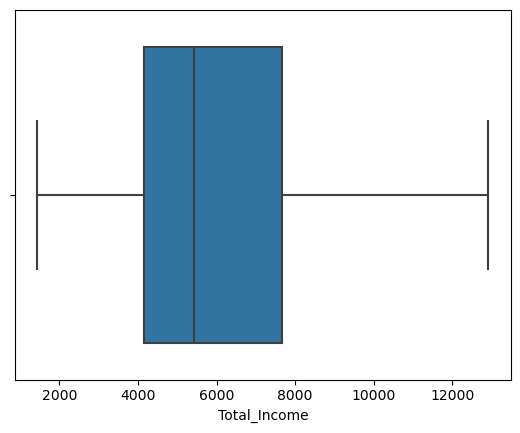

In [102]:
#Getting the boxplot of the Total_Income without the outliers
sns.boxplot(x = new_finance_loan_df['Total_Income'], showfliers=False)

<Axes: xlabel='Loan_Amount'>

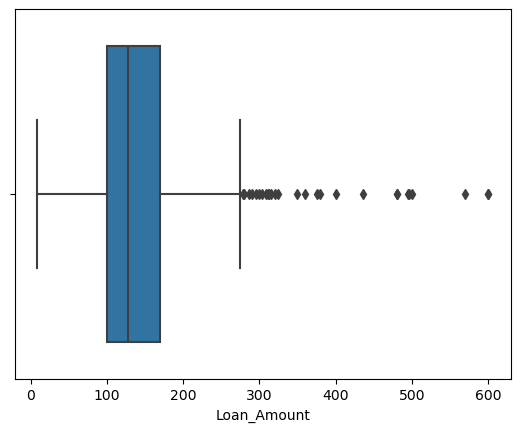

In [103]:
#Getting the boxplot of the Loan_Amount 
sns.boxplot(x = new_finance_loan_df['Loan_Amount'])

<Axes: xlabel='Loan_Amount'>

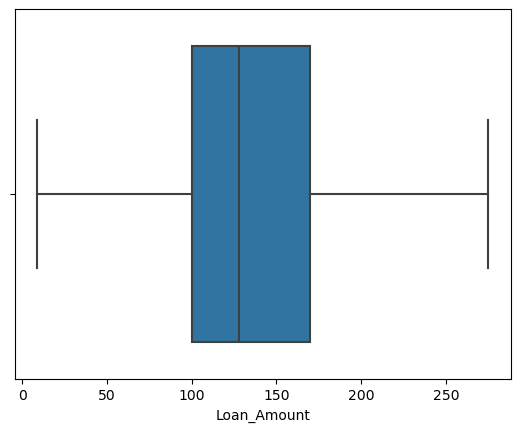

In [104]:
#Getting the boxplot of the Loan_Amount without outliers
sns.boxplot(x = new_finance_loan_df['Loan_Amount'],showfliers=False)

<Axes: title={'center': 'Terms_of_loan_in_months'}, xlabel='Terms_of_loan_in_months'>

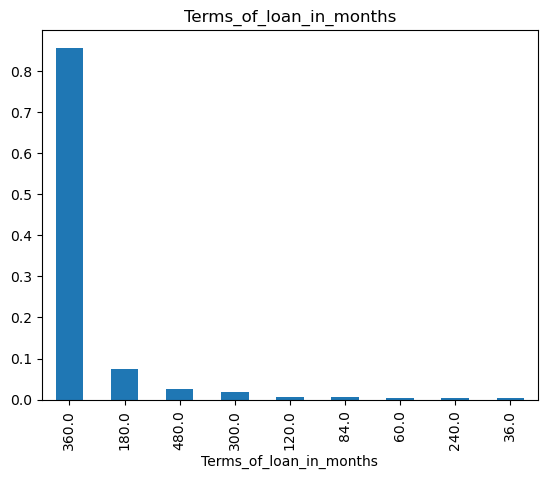

In [105]:
# plot bar chart of Terms_of_loan_in_months
new_finance_loan_df['Terms_of_loan_in_months'].value_counts(normalize=True).plot.bar(title= 'Terms_of_loan_in_months')

## Split the Data into Training and Testing Sets

In [106]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = new_finance_loan_df["Loan_Status"]
# Separate the X variable, the features
X = new_finance_loan_df.drop(columns=["Loan_Status"])

In [107]:
# Review the y variable Series
display(y.head())
display(y.tail())

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, dtype: int64

In [108]:
# Review the X variable DataFrame
display(X.head())
display(X.tail())

,ID,Gender,Married,Number_of_Dependents,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Terms_of_loan_in_months,Credit_History,...,Graduate,Not Graduate,Average,High,Low,Very_High,Very_Low,Rural,Semiurban,Urban
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,...,True,False,False,False,True,False,False,True,False,False
2,2,1,1,0,1,3000,0.0,66.0,360.0,1.0,...,True,False,False,False,True,False,False,False,False,True
3,3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,...,False,True,False,False,True,False,False,False,False,True
4,4,1,0,0,0,6000,0.0,141.0,360.0,1.0,...,True,False,False,False,True,False,False,False,False,True
5,5,1,1,2,1,5417,4196.0,267.0,360.0,1.0,...,True,False,False,False,True,False,False,False,False,True


,ID,Gender,Married,Number_of_Dependents,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Terms_of_loan_in_months,Credit_History,...,Graduate,Not Graduate,Average,High,Low,Very_High,Very_Low,Rural,Semiurban,Urban
609,476,0,0,0,0,2900,0.0,71.0,360.0,1.0,...,True,False,False,False,True,False,False,True,False,False
610,477,1,1,3,0,4106,0.0,40.0,180.0,1.0,...,True,False,False,False,True,False,False,True,False,False
611,478,1,1,1,0,8072,240.0,253.0,360.0,1.0,...,True,False,True,False,False,False,False,False,False,True
612,479,1,1,2,0,7583,0.0,187.0,360.0,1.0,...,True,False,True,False,False,False,False,False,False,True
613,480,0,0,0,1,4583,0.0,133.0,360.0,0.0,...,True,False,False,False,True,False,False,False,True,False


### Split the data into training and testing datasets by using `train_test_split`.

In [109]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split and assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,stratify=y)

In [110]:
# Dimension of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((360, 21), (120, 21), (360,), (120,))

## Create a Logistic Regression Model

In [111]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)


In [112]:
# Fit the model using training data
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [113]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Evaluation

In [114]:
# Make a prediction using the testing data
lr_predictions = lr_model.predict(X_test)
pd.DataFrame({'Predictions': lr_predictions, 'Actual': y_test})

C:\Users\laris\anaconda3\anaconda1\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,Predictions,Actual
286,1,0
538,0,0
167,1,1
574,1,0
106,1,1
...,...,...
534,0,1
562,1,1
123,1,1
258,1,0


In [115]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, lr_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)


In [116]:
# Print the classification report for the model
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.58      0.70      0.63        37
           1       0.85      0.77      0.81        83

    accuracy                           0.75       120
   macro avg       0.72      0.74      0.72       120
weighted avg       0.77      0.75      0.76       120



In [117]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, lr_predictions)

0.75

**Note**: The performance of our model has 75% accuracy, precision of 83% and recall of 99%.

## Decision Tree Model

In [118]:
#import the dependences
from sklearn import tree
# Needed for decision tree visualization
#import pydotplus
from IPython.display import Image

In [119]:
#Load the data
new_finance_loan_df.head()

,ID,Gender,Married,Number_of_Dependents,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Terms_of_loan_in_months,Credit_History,...,Graduate,Not Graduate,Average,High,Low,Very_High,Very_Low,Rural,Semiurban,Urban
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,...,True,False,False,False,True,False,False,True,False,False
2,2,1,1,0,1,3000,0.0,66.0,360.0,1.0,...,True,False,False,False,True,False,False,False,False,True
3,3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,...,False,True,False,False,True,False,False,False,False,True
4,4,1,0,0,0,6000,0.0,141.0,360.0,1.0,...,True,False,False,False,True,False,False,False,False,True
5,5,1,1,2,1,5417,4196.0,267.0,360.0,1.0,...,True,False,False,False,True,False,False,False,False,True


In [120]:
# Define features set
X = new_finance_loan_df.copy()
X.drop('Loan_Status', axis=1, inplace=True)
X.head()

,ID,Gender,Married,Number_of_Dependents,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Terms_of_loan_in_months,Credit_History,...,Graduate,Not Graduate,Average,High,Low,Very_High,Very_Low,Rural,Semiurban,Urban
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,...,True,False,False,False,True,False,False,True,False,False
2,2,1,1,0,1,3000,0.0,66.0,360.0,1.0,...,True,False,False,False,True,False,False,False,False,True
3,3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,...,False,True,False,False,True,False,False,False,False,True
4,4,1,0,0,0,6000,0.0,141.0,360.0,1.0,...,True,False,False,False,True,False,False,False,False,True
5,5,1,1,2,1,5417,4196.0,267.0,360.0,1.0,...,True,False,False,False,True,False,False,False,False,True


In [121]:
# Define target vector
y = new_finance_loan_df["Loan_Status"]
y[:5]

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [122]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [123]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [124]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [125]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Decision Tree Model

In [126]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [127]:
# Fit the model
model = model.fit(X_train_scaled, y_train)

## Making Predictions Using the Tree Model

In [128]:
# Making predictions using the testing data
cm_predictions = model.predict(X_test_scaled)

## Model Evaluation

In [129]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, cm_predictions)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, cm_predictions)

In [130]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, cm_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,26,11
Actual 1,19,64


Accuracy Score : 0.7416666666666667
Classification Report
              precision    recall  f1-score   support

           0       0.55      0.63      0.59        35
           1       0.84      0.79      0.81        85

    accuracy                           0.74       120
   macro avg       0.69      0.71      0.70       120
weighted avg       0.75      0.74      0.75       120



**Note**: The performance of our model has 76% accuracy, precision of 83% and recall of 80%.